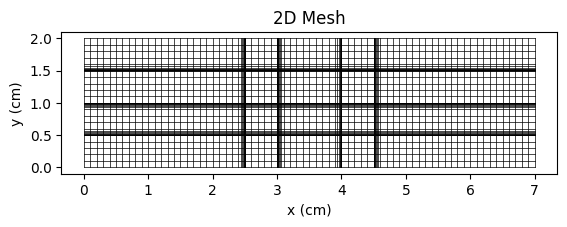

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def make_2D(x_edges, y_edges):
    """
    @brief   Sets up mesh.

    @details Sets up fixed spatial mesh.
    @return  None

    Mesh creation
    =============

    The overall problem size and number of mesh cells are specified as user
    input, and the cell size ($dx$) is calculated from these.

    Arrays of both the cell-centre and the cell-edge (node) positions are
    created.

    Cell-centred arrays for temperature, initial temperature, opacity, and total energy deposited, are initialised.
    """
    x_edges = np.asarray(x_edges)
    y_edges = np.asarray(y_edges)

    dx = np.diff(x_edges)
    dy = np.diff(y_edges)

    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    y_centers = 0.5 * (y_edges[:-1] + y_edges[1:])

    Nx = len(dx)
    Ny = len(dy)

    # Meshgrid of cell centers
    xcoord, ycoord = np.meshgrid(x_centers, y_centers, indexing='ij') # shape (Nx, Ny)

    return x_edges, y_edges, dx, dy, x_centers, y_centers, Nx, Ny, xcoord, ycoord

x_edges = [0.00000, 1.00000e-01, 2.00000e-01, 3.00000e-01, 4.00000e-01, 
           5.00000e-01, 6.00000e-01, 7.00000e-01, 8.00000e-01, 9.00000e-01, 
           1.00000, 1.10000, 1.20000, 1.30000, 1.40000,
           1.50000, 1.60000, 1.70000, 1.80000, 1.90000, 
           2.00000, 2.10000, 2.20000, 2.30000, 2.40000,
           2.43283, 2.45511, 2.47022, 2.48048, 2.48743, 
           2.49215, 2.49535, 2.49753, 2.49900, 2.50000, 
           2.60000, 2.70000, 2.80000, 2.90000, 3.00000, 
           3.00100, 3.00247, 3.00465, 3.00785, 3.01257, 
           3.01952, 3.02978, 3.04489, 3.06717, 3.10000, 
           3.20000, 3.30000, 3.40000, 3.50000, 3.60000, 
           3.70000, 3.80000, 3.90000, 3.93283, 3.95511, 
           3.97022, 3.98048, 3.98743, 3.99215, 3.99535, 
           3.99753, 3.99900, 4.00000, 4.10000, 4.20000, 
           4.30000, 4.40000, 4.50000, 4.50100, 4.50247, 
           4.50465, 4.50785, 4.51257, 4.51952, 4.52978, 
           4.54489, 4.56717, 4.60000, 4.70000, 4.80000, 
           4.90000, 5.00000, 5.10000, 5.20000, 5.30000, 
           5.40000, 5.50000, 5.60000, 5.70000, 5.80000, 
           5.90000, 6.00000, 6.10000, 6.20000, 6.30000, 
           6.40000, 6.50000, 6.60000, 6.70000, 6.80000, 
           6.90000, 7.00000]

y_edges = [0.00000, 1.00000e-01, 2.00000e-01, 3.00000e-01, 4.00000e-01, 
           5.00000e-01, 5.01000e-01, 5.02474e-01, 5.04646e-01, 5.07849e-01,
           5.12568e-01, 5.19525e-01, 5.29778e-01, 5.44891e-01, 5.67167e-01,
           6.00000e-01, 7.00000e-01, 8.00000e-01, 9.00000e-01, 9.32833e-01, 
           9.55109e-01, 9.70222e-01, 9.80475e-01, 9.87432e-01, 9.92151e-01,
           9.95354e-01, 9.97526e-01, 9.99000e-01, 1.00000, 1.10000, 
           1.20000, 1.30000, 1.40000, 1.50000, 1.50100, 
           1.50247, 1.50465, 1.50785, 1.51257, 1.51952, 
           1.52978, 1.54489, 1.56717, 1.60000, 1.70000, 
           1.80000, 1.90000, 2.00000]

x_edges, y_edges, dx, dy, x_centers, y_centers, Nx, Ny, xcoord, ycoord = make_2D(x_edges, y_edges)

def plot_mesh_with_centers(x_edges, y_edges):
    fig, ax = plt.subplots()

    # Grid lines
    for x in x_edges:
        ax.plot([x, x], [y_edges[0], y_edges[-1]], color='black', linewidth=0.5)
    for y in y_edges:
        ax.plot([x_edges[0], x_edges[-1]], [y, y], color='black', linewidth=0.5)

    # Cell centers
    # ax.plot(xcoord.flatten(), ycoord.flatten(), 'ro')
    ax.set_aspect('equal')
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    ax.set_title("2D Mesh")
    plt.grid(False)
    plt.show()

plot_mesh_with_centers(x_edges, y_edges)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray


# Random Sampling Functions
def sample_radius(r_min: float,
                  r_max: float
) -> float:
    """Given r_min and r_max, sample an r position in the cell.
    Since emission is uniform in volume, the pdf for sampling r is f(r)=2r/r_max^2."""
    r = np.sqrt(r_min**2 + np.random.uniform()*(r_max**2 - r_min**2))
    return r

def sample_z(z_min: float,
             z_max: float
) -> float:
    """Given z_min and z_max, sample a z position in the cell"""
    z = z_min + np.random.uniform()*(z_max - z_min)
    return z

def sample_mu_isotropic() -> float:
    return 2 * np.random.uniform() - 1.0

def sample_phi_isotropic() -> float:
    return 2 * np.pi * np.random.uniform()

# Deterministic Sampling Functions

def deterministic_sample_radius(r_min: float,
                                r_max: float,
                                n_samples: int
) -> NDArray:
    """
    Deterministically sample R for a cylindrical shell.
    """
    # centered uniform points
    p_values = np.arange(n_samples + 0.5) / n_samples
    # apply the PDF
    r_values = np.sqrt(r_min**2 + p_values * (r_max**2 - r_min**2))
    return r_values
    
def deterministic_sample_z(z_min: float,
                           z_max:float,
                           n_samples: int
) -> NDArray:
    """
    Determinstically sample Z for a cylindrical shell.
    """
    # Assume a uniform distribution
    z_values = z_min + (np.arange(n_samples)+0.5) * (z_max - z_min) / n_samples
    return z_values

def deterministic_sample_mu_isotropic(n_samples) -> NDArray:
    return -1.0 + ((np.arange(n_samples)) + 0.5) * 2 / n_samples

def deterministic_sample_phi_isotropic(n_samples) -> NDArray:
    return (0.0 + (np.arange(n_samples) + 0.5)) * 2 * np.pi / n_samples


# Tests for functions. Run 1e6 samples for each function to compare average between random
# determinsitic sampling

# --- Configuration ---
N_SAMPLES = int(1e7)
R_MIN, R_MAX = 1.0, 5.0
Z_MIN, Z_MAX = 10.0, 20.0

# --- 1. Radius (R) ---

# 1. Random Sampling
random_samples = np.array([sample_radius(R_MIN, R_MAX) for _ in range(N_SAMPLES)])
random_mean = np.mean(random_samples)

# 2. Deterministic Sampling
deterministic_samples = deterministic_sample_radius(R_MIN, R_MAX, N_SAMPLES)
deterministic_mean = np.mean(deterministic_samples)

print("--------------------------------------------------")
print(f'Radius')
print(f"| Random Sampling Mean   | {random_mean:.8f} |")
print(f"| Deterministic Mean | {deterministic_mean:.8f} |")

# --- 2. Z (z) ---
# 1. Random Sampling
random_samples = np.array([sample_z(R_MIN, R_MAX) for _ in range(N_SAMPLES)])
random_mean = np.mean(random_samples)

# 2. Deterministic Sampling
deterministic_samples = deterministic_sample_z(R_MIN, R_MAX, N_SAMPLES)
deterministic_mean = np.mean(deterministic_samples)

print("--------------------------------------------------")
print(f'Z')
print(f"| Random Sampling Mean   | {random_mean:.8f} |")
print(f"| Deterministic Mean | {deterministic_mean:.8f} |")

# --- 3. mu  ---
# 1. Random Sampling
random_samples = np.array([sample_mu_isotropic() for _ in range(N_SAMPLES)])
random_mean = np.mean(random_samples)

# 2. Deterministic Sampling
deterministic_samples = deterministic_sample_mu_isotropic(N_SAMPLES)
deterministic_mean = np.mean(deterministic_samples)

print("--------------------------------------------------")
print(f'Mu')
print(f"| Random Sampling Mean   | {random_mean:.8f} |")
print(f"| Deterministic Mean | {deterministic_mean:.8f} |")

# --- 3. Phi  ---
# 1. Random Sampling
random_samples = np.array([sample_phi_isotropic() for _ in range(N_SAMPLES)])
random_mean = np.mean(random_samples)

# 2. Deterministic Sampling
deterministic_samples = deterministic_sample_phi_isotropic(N_SAMPLES)
deterministic_mean = np.mean(deterministic_samples)

print("--------------------------------------------------")
print(f'Phi')
print(f"| Random Sampling Mean   | {random_mean:.8f} |")
print(f"| Deterministic Mean | {deterministic_mean:.8f} |")

--------------------------------------------------
Radius
| Random Sampling Mean   | 3.44425958 |
| Deterministic Mean | 3.44444440 |
--------------------------------------------------
Z
| Random Sampling Mean   | 3.00048063 |
| Deterministic Mean | 3.00000000 |
--------------------------------------------------
Mu
| Random Sampling Mean   | 0.00024326 |
| Deterministic Mean | 0.00000000 |
--------------------------------------------------
Phi
| Random Sampling Mean   | 3.14259733 |
| Deterministic Mean | 3.14159265 |


In [5]:
import numpy as np

def distance_to_r_boundary(r: float,
                           mu: float,
                           phi: float,
                           r_min: float,
                           r_max: float
):
    """
    Calculates the distance to the nearest radial (R) boundary.
    """
    # 1. Pre-calculate directional components
    # sin(theta)^2 = 1 - cos(theta)^2
    sin_theta_sq = 1.0 - mu**2
    # Omega_r is the component of the direction vector along the current radius
    omega_r = np.sqrt(sin_theta_sq) * np.cos(phi)
    
    # Quadratic coefficients: Ad^2 + Bd + C = 0
    # A is the projection of the direction onto the r-theta plane squared
    a = sin_theta_sq
    b = 2.0 * r * omega_r
    
    # If a is 0, the particle is moving parallel to the Z-axis
    if a <= 1e-15:
        return float('inf')

    # 2. Check outer boundary (r_max)
    c_out = r**2 - r_max**2
    disc_out = b**2 - 4.0 * a * c_out
    
    # For r_max, we always take the positive root (heading outward)
    # Using the more stable form of the quadratic solution
    d_rmax = (-b + np.sqrt(max(0, disc_out))) / (2.0 * a)
    
    # 3. Check inner boundary (r_min)
    d_rmin = float('inf')
    if r_min > 0:
        c_in = r**2 - r_min**2
        disc_in = b**2 - 4.0 * a * c_in
        
        # If discriminant is negative, we miss the inner cylinder entirely
        if disc_in >= 0:
            # The smaller root is the entry point to the inner cylinder
            res = (-b - np.sqrt(disc_in)) / (2.0 * a)
            if res > 0:
                d_rmin = res
                
    return min(d_rmax, d_rmin)

def distance_to_z_boundary(z: float,
                           mu: float,
                           z_min: float,
                           z_max: float
):
    """
    Calculates the distance to the nearest axial (Z) boundary,

    
    :param z (float): Current Z coordinate
    :param mu (float): Cosine of the polar angle (wrt Z axis)
    :param z_min (float): Lower Z boundary of the cell
    :param z_max (float): Upper Z boundary of the cell
    """
    if mu == 0:
        return float('inf')
    if mu > 0:
        # Particle is moving "up" toward z_max
        return (z_max - z) / mu
    else:
        # Particle is moving "down" toward z_min
        return (z_min - z) / mu

def get_distance_to_nearest_boundary(r, z, mu, phi, r_min, r_max, z_min, z_max):
    """
    Calculates the minimum distance to any boundary in RZ geometry.
    """
    # Calculate distance to axial walls
    d_z = distance_to_z_boundary(z, mu, z_min, z_max)
    
    # Calculate distance to radial walls
    d_r = distance_to_r_boundary(r, mu, phi, r_min, r_max)
    
    # The nearest boundary is the minimum of the two
    return min(d_z, d_r)

# Setup geometry
r_min, r_max = 0.0, 10.0
z_min, z_max = 0.0, 10.0

# Case A: Dead center, moving purely up (mu=1)
# Result: Should hit z_max. distance = z_max - current_z
r, z = 0.0, 5.0
mu, phi = 1.0, 0.0 
d = get_distance_to_nearest_boundary(r, z, mu, phi, r_min, r_max, z_min, z_max)
print(f"Case A (Upward): Expected 5.0, Got {d}")

# Case B: Dead center, moving purely horizontal (mu=0)
# Result: Should hit r_max. distance = r_max
r, z = 0.0, 5.0
mu, phi = 0.0, 0.0
d = get_distance_to_nearest_boundary(r, z, mu, phi, r_min, r_max, z_min, z_max)
print(f"Case B (Horizontal): Expected 10.0, Got {d}")

# Case C: Near outer edge, moving outward (phi=0)
r, z = 9.0, 5.0
mu, phi = 0.0, 0.0
d = get_distance_to_nearest_boundary(r, z, mu, phi, r_min, r_max, z_min, z_max)
print(f"Case C (Outward): Expected 1.0, Got {d}")

# Case D: Moving toward an inner boundary (r_min > 0)
r_min_hollow = 2.0
r, z = 5.0, 5.0
mu, phi = 0.0, np.pi # phi = pi means moving directly toward the center
d = get_distance_to_nearest_boundary(r, z, mu, phi, r_min_hollow, r_max, z_min, z_max)
print(f"Case D (Inward toward r_min): Expected 3.0, Got {d}")


for _ in range(100000):
    r = sample_radius(r_min, r_max)
    z = sample_z(z_min, z_max)
    mu = sample_mu_isotropic()
    phi = sample_phi_isotropic()
    
    d = get_distance_to_nearest_boundary(r, z, mu, phi, r_min, r_max, z_min, z_max)
    
    if np.isnan(d) or d < 0:
        print(f"ERROR: Invalid distance {d} at r={r}, z={z}, mu={mu}")
        break
else:
    print("Stress test passed: 10,000 samples returned valid distances.")


Case A (Upward): Expected 5.0, Got 5.0
Case B (Horizontal): Expected 10.0, Got 10.0
Case C (Outward): Expected 1.0, Got 1.0
Case D (Inward toward r_min): Expected 3.0, Got 3.0
Stress test passed: 10,000 samples returned valid distances.


In [9]:
import numpy as np
from numpy.typing import NDArray

def sample_mu_lambertian() -> float:
    """
    Produce mu between 0 and 1 with a lambertian distribution
    """
    return np.sqrt(np.random.uniform())

def deterministic_sample_mu_lambertian(n_samples) -> NDArray:
    """
    Produce n_samples of mu between 0 and 1 with a lambertian distribution
    """
    return np.sqrt(((np.arange(n_samples)) + 0.5) / n_samples)

N_SAMPLES = int(1e6)
# 1. Random Sampling
random_samples = np.array([sample_mu_lambertian() for _ in range(N_SAMPLES)])
random_mean = np.mean(random_samples)

# 2. Deterministic Sampling
deterministic_samples = deterministic_sample_mu_lambertian(N_SAMPLES)
deterministic_mean = np.mean(deterministic_samples)

print("--------------------------------------------------")
print(f'Phi')
print(f"| Random Sampling Mean   | {random_mean:.8f} |")
print(f"| Deterministic Mean | {deterministic_mean:.8f} |")

--------------------------------------------------
Phi
| Random Sampling Mean   | 0.66668751 |
| Deterministic Mean | 0.66666667 |


In [16]:
def deterministic_sample_radius(r_min: float,
                                r_max: float,
                                n_samples: int
) -> NDArray:
    """
    Deterministically sample R for a cylindrical shell.
    """
    # centered uniform points between 0 and 1
    p_values = (np.arange(n_samples) + 0.5) / n_samples
    print(f'p_values = {p_values}')
    # apply the PDF
    r_values = np.sqrt(r_min**2 + p_values * (r_max**2 - r_min**2))
    return r_values

r_values = deterministic_sample_radius(0.0, 0.5, 50)
print(f'r_values = {r_values}')

p_values = [0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99]
r_values = [0.05       0.08660254 0.1118034  0.13228757 0.15       0.16583124
 0.18027756 0.19364917 0.20615528 0.21794495 0.22912878 0.23979158
 0.25       0.25980762 0.26925824 0.27838822 0.28722813 0.29580399
 0.30413813 0.3122499  0.32015621 0.32787193 0.3354102  0.34278273
 0.35       0.35707142 0.36400549 0.37080992 0.37749172 0.38405729
 0.39051248 0.3968627  0.40311289 0.40926764 0.41533119 0.42130749
 0.42720019 0.4330127  0.43874822 0.44440972 0.45       0.45552168
 0.46097722 0.46636895 0.47169906 0.4769696  0.48218254 0.48733972
 0.49244289 0.49749372]


t_values = [0.00893209 0.04080585 0.10499359 0.22145529 0.39762984 0.60237016
 0.77854471 0.89500641 0.95919415 0.99106791]
weights = [0.0214646  0.04480204 0.08704832 0.14748912 0.19919592 0.19919592
 0.14748912 0.08704832 0.04480204 0.0214646 ]
t_values_uniform = [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
t_values = [0.00893209 0.04080585 0.10499359 0.22145529 0.39762984 0.60237016
 0.77854471 0.89500641 0.95919415 0.99106791]
weights = [0.5 0.5]
t_values_uniform = [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


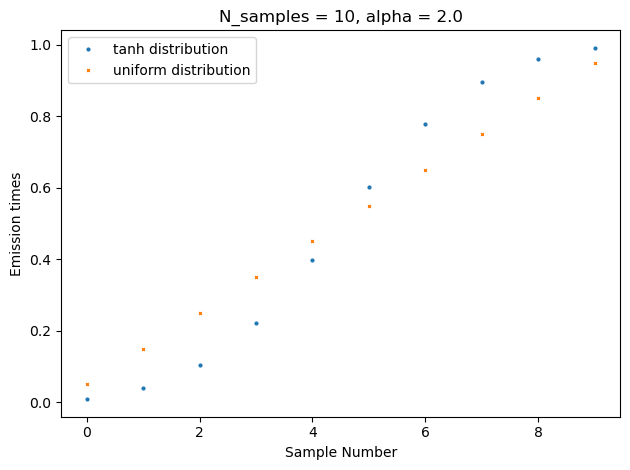

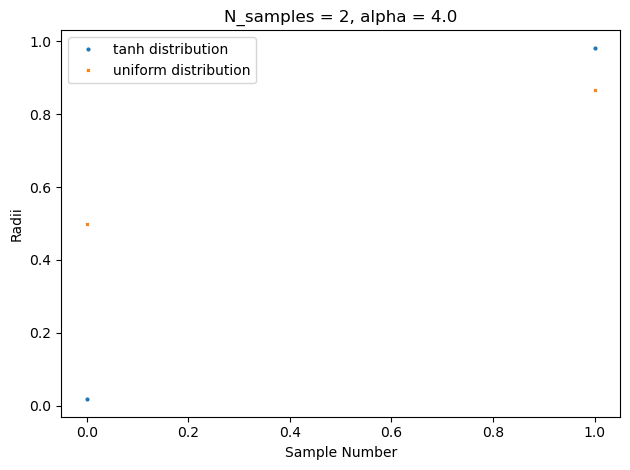

In [5]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

def deterministic_sample_t_tanh_dist(n_samples, 
                                     alpha, 
                                     t_lower, 
                                     t_upper
) -> tuple[NDArray, NDArray]:
    """
    Sample T non-uniformly to get better clustering near the edges.
    
    Based on the tanh mapping: x = 0.5 * [tanh(alpha * j) / tanh(alpha)]
    """
    
    i = np.arange(n_samples)
    j = (i + 0.5) / n_samples - 0.5
    j_scaled = j * 2  
    
    dt = t_upper - t_lower
    t_mid = (t_upper + t_lower) / 2
    
    t_values = t_mid + (dt / 2) * (np.tanh(alpha * j_scaled) / np.tanh(alpha))
    
    weights = 1.0 / (np.cosh(alpha * j_scaled)**2)
    
    weights /= np.sum(weights)
    
    return t_values, weights

def deterministic_sample_z(z_min: float,
                           z_max:float,
                           n_samples: int
) -> NDArray:
    """
    Determinstically sample Z for a cylindrical shell.
    """
    # Assume a uniform distribution
    z_values = z_min + (np.arange(n_samples)+0.5) * (z_max - z_min) / n_samples
    return z_values


n_samples = 10
alpha = 2.0
t_lower = 0.0
t_upper = 1.0
t_values, weights = deterministic_sample_t_tanh_dist(n_samples, 2.0, t_lower, t_upper)
t_values_uniform = deterministic_sample_z(t_lower, t_upper, n_samples)
print(f't_values = {t_values}')

print(f'weights = {weights}')
print(f't_values_uniform = {t_values_uniform}')
plt.figure()
plt.title(f'N_samples = {n_samples}, alpha = {alpha}')
plt.plot(t_values, linestyle='none', marker='o', markersize=2, label='tanh distribution')
plt.plot(t_values_uniform, linestyle='none', marker='x', markersize=2, label='uniform distribution')
plt.legend()
plt.ylabel('Emission times')
plt.xlabel('Sample Number')
plt.tight_layout()
plt.savefig('tanh.png',dpi=900)

def deterministic_sample_r_tanh_dist(
    n_samples: int,
    alpha: float,
    r_min: float,
    r_max: float
) -> tuple[NDArray, NDArray]:
    """
    Sample radius R using a tanh distribution to cluster points near r_min and r_max,
    while maintaining the physical PDF weights of a cylindrical shell.
    """
    # 1. Generate the tanh-mapped values (p_values) in the range [0, 1]
    # We use the same logic as the time-sampling but shifted to [0, 1]
    i = np.arange(n_samples)
    j = (i + 0.5) / n_samples - 0.5  # Range [-0.5, 0.5]
    j_scaled = j * 2                 # Range [-1, 1]
    
    # This maps j_scaled to a non-linear range [0, 1]
    # p_values will be clustered near 0 and 1
    p_values = 0.5 + 0.5 * (np.tanh(alpha * j_scaled) / np.tanh(alpha))
    
    # 2. Map these p_values to Radius using the physical PDF (Cylindrical shell)
    # r = sqrt(r_min^2 + p * (r_max^2 - r_min^2))
    r_sq_diff = r_max**2 - r_min**2
    r_values = np.sqrt(r_min**2 + p_values * r_sq_diff)
    
    # 3. Calculate weights
    # The weight is composed of two parts:
    # A) The tanh Jacobian: 1 / cosh^2(alpha * j_scaled)
    # B) The Radial Jacobian: The uniform-to-radius transformation is self-correcting 
    #    if we use the tanh weights directly.
    weights = 1.0 / (np.cosh(alpha * j_scaled)**2)
    
    # 4. Normalize weights so their mean is 1.0
    weights = weights / np.mean(weights)
    
    return r_values, weights

def deterministic_sample_radius(r_min: float,
                                r_max: float,
                                n_samples: int
) -> NDArray:
    """
    Deterministically sample R for a cylindrical shell.
    """
    # centered uniform points
    p_values = (np.arange(n_samples) + 0.5) / n_samples
    # apply the PDF
    r_values = np.sqrt(r_min**2 + p_values * (r_max**2 - r_min**2))
    return r_values

n_samples = 2
alpha = 4.0
r_lower = 0.0
r_upper = 1.0
r_values, weights = deterministic_sample_t_tanh_dist(n_samples, alpha, r_lower, r_upper)
r_values_uniform = deterministic_sample_radius(r_lower, r_upper, n_samples)
print(f't_values = {t_values}')

print(f'weights = {weights}')
print(f't_values_uniform = {t_values_uniform}')
plt.figure()
plt.title(f'N_samples = {n_samples}, alpha = {alpha}')
plt.plot(r_values, linestyle='none', marker='o', markersize=2, label='tanh distribution')
plt.plot(r_values_uniform, linestyle='none', marker='x', markersize=2, label='uniform distribution')
plt.legend()
plt.ylabel('Radii')
plt.xlabel('Sample Number')
plt.tight_layout()
plt.savefig('tanh_radius.png',dpi=900)

In [4]:
import numpy as np

r_points = np.linspace(0.00, 0.08, int((0.08 - 0.00) / 5e-4) + 1)
z_points = np.linspace(0.00, 0.1, int((0.1 - 0.00) / 5e-4) + 1)

print(r_points)
print(z_points)

[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014  0.0145
 0.015  0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019  0.0195
 0.02   0.0205 0.021  0.0215 0.022  0.0225 0.023  0.0235 0.024  0.0245
 0.025  0.0255 0.026  0.0265 0.027  0.0275 0.028  0.0285 0.029  0.0295
 0.03   0.0305 0.031  0.0315 0.032  0.0325 0.033  0.0335 0.034  0.0345
 0.035  0.0355 0.036  0.0365 0.037  0.0375 0.038  0.0385 0.039  0.0395
 0.04   0.0405 0.041  0.0415 0.042  0.0425 0.043  0.0435 0.044  0.0445
 0.045  0.0455 0.046  0.0465 0.047  0.0475 0.048  0.0485 0.049  0.0495
 0.05   0.0505 0.051  0.0515 0.052  0.0525 0.053  0.0535 0.054  0.0545
 0.055  0.0555 0.056  0.0565 0.057  0.0575 0.058  0.0585 0.059  0.0595
 0.06   0.0605 0.061  0.0615 0.062  0.0625 0.063  0.0635 0.064  0.0645
 0.065  0.0655 0.066  0.0665 0.067  0.0675 0.068  0.0685 0.069  0.0695
 0.07 